# Specimage module for Myelin Raman data
## 2016.10.05 Data import into the module from matlab file

First, we have to import a few modules. Notice that we also add the path to where we can find the **specimage** module before importing it.

In [1]:
%load_ext autoreload
%autoreload 2
import sys
# change next line to the directory where you have the specimage.py file
sys.path.append('/home/leo/Academic/Projects/150-savvy/060.python')
from specimage import *
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import rpy2.robjects, rpy2.robjects.numpy2ri # read Rdata objects from R 

Now we are ready to read the Matlab file. Here I first openned the matlab file using the R statistical language and exported each data matrix (each Raman image and mask file) as one separate Rdata file.

The R script I used was:

```R
library("R.matlab");
mt <- readMat("Analysis_masks.mat");
for (i in 1:84) { # the matlab file has 84 distinct objects (matrices), some will not be used 
  x<-mt[[i]]; # ALL files will have same variable name, "x", but different data
  save(x, file=paste(names(mt)[i],".Rdata",sep=""),compress=TRUE);
  # Rdata format specific to R but fast to save/load
}
```
I also created by hand the file *02.file_shape.txt* with the mask files corresponding to each Raman image file. The code below shows that the dimensions of the files agree (the image file is 3D since it has 2D location and 1383 wavelengths)

In [2]:
path = "/home/leo/Academic/Projects/150-savvy/050.received_data/201609.MyelinRaman/"
wl_axis = np.array([thisline.rstrip() for thisline in open(path + "02.wl_axis.txt")],dtype=float)
pairfiles = [re.split('\s+',thisline.rstrip()) for thisline in open(path + "02.file_shape.txt")]
files = [[x[0]+".Rdata",x[1]+"LEFT.Rdata", x[1]+"RIGHT.Rdata"] for x in pairfiles]
for fname in files:
    rpy2.robjects.r['load'](path+fname[0]) # loads single variable, called "x" in R namespace
    y=rpy2.robjects.numpy2ri.ri2py(rpy2.robjects.r['x']) ## y is a numpy 2D or 3D matrix
    rpy2.robjects.r['load'](path+fname[1]) 
    m_l=rpy2.robjects.numpy2ri.ri2py(rpy2.robjects.r['x'])
    rpy2.robjects.r['load'](path+fname[2]) 
    m_r=rpy2.robjects.numpy2ri.ri2py(rpy2.robjects.r['x'])
    print (fname[0], "\t", y.shape, " -> ", m_l.shape, " and ", m_r.shape)

c0.1.Rdata 	 (60, 122, 1383)  ->  (60, 122)  and  (60, 122)
c0.2.Rdata 	 (77, 147, 1383)  ->  (77, 147)  and  (77, 147)
c0.3.Rdata 	 (55, 105, 1383)  ->  (55, 105)  and  (55, 105)
s14.1.Rdata 	 (79, 164, 1383)  ->  (79, 164)  and  (79, 164)
s14.2.Rdata 	 (68, 108, 1383)  ->  (68, 108)  and  (68, 108)
s14.3.Rdata 	 (68, 109, 1383)  ->  (68, 109)  and  (68, 109)
s3.1.Rdata 	 (75, 137, 1383)  ->  (75, 137)  and  (75, 137)
s3.2.Rdata 	 (54, 110, 1383)  ->  (54, 110)  and  (54, 110)
s3.3.Rdata 	 (76, 158, 1383)  ->  (76, 158)  and  (76, 158)
d14.1.Rdata 	 (67, 171, 1383)  ->  (67, 171)  and  (67, 171)
d14.2.Rdata 	 (80, 200, 1383)  ->  (80, 200)  and  (80, 200)
d14.3.Rdata 	 (81, 121, 1383)  ->  (81, 121)  and  (81, 121)
r21.1.Rdata 	 (85, 139, 1383)  ->  (85, 139)  and  (85, 139)
r21.2.Rdata 	 (58, 100, 1383)  ->  (58, 100)  and  (58, 100)
r21.3.Rdata 	 (65, 117, 1383)  ->  (65, 117)  and  (65, 117)
r28.1.Rdata 	 (81, 147, 1383)  ->  (81, 147)  and  (81, 147)
r28.2.Rdata 	 (78, 155, 1383) 

### A few tests
Let us try importing one image file into Specimage just to see if image dimensions etc. are good.

445 5330
[['c0.1', 'control.6..'], ['c0.2', 'control.9..'], ['c0.3', 'control.1..'], ['s14.1', 'saline14.39..'], ['s14.2', 'saline14.40..'], ['s14.3', 'saline14.43..'], ['s3.1', 'saline3.9..'], ['s3.2', 'saline3.11..'], ['s3.3', 'saline3.17..'], ['d14.1', 'toxin14.4..'], ['d14.2', 'toxin14.22..'], ['d14.3', 'toxin14.27..'], ['r21.1', 'toxin21.11..'], ['r21.2', 'toxin21.34..'], ['r21.3', 'toxin21.30..'], ['r28.1', 'toxin28.46..'], ['r28.2', 'toxin28.51..'], ['r28.3', 'toxin28.52..']]


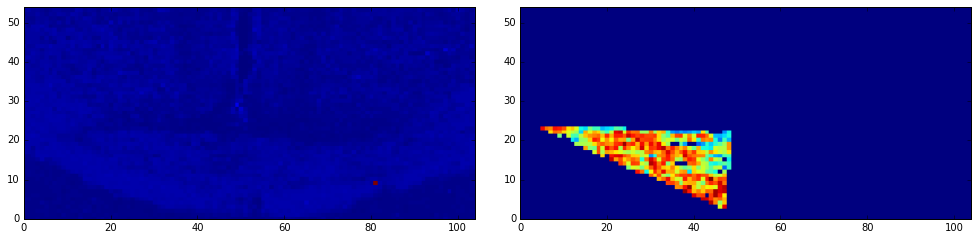

In [18]:
## TESTING  with one image
rpy2.robjects.r['load'](path+files[2][0]) # loads single variable, called "x" in R namespace
y=rpy2.robjects.numpy2ri.ri2py(rpy2.robjects.r['x'])
a=SpecImage()
a.wl = wl_axis # from file with wavelength numbers
a.description = "testing"
n_y = y.shape[0]; n_x = y.shape[1]
a.xy = np.array([[i,j] for i in range(n_x) for j in range(n_y)],dtype=float)
a.spc = np.array([y[j,i] for i in range(n_x) for j in range(n_y)],dtype=float)

## MASK for same image
rpy2.robjects.r['load'](path+files[2][1]) # loads single variable, called "x" in R namespace
y=rpy2.robjects.numpy2ri.ri2py(rpy2.robjects.r['x'])
n_y = y.shape[0]; n_x = y.shape[1]
mask = np.array([y[j,i] for i in range(n_x) for j in range(n_y)],dtype=int) # boolean list (0 or 255)
valid   = [i for i, x in enumerate(mask) if x] # index of non-zero elements
invalid = [i for i, x in enumerate(mask) if not x] # index of zero elements

print (len(valid), len(invalid))
print (pairfiles)

fig, axes = plt.subplots(1,2) ; fig.set_size_inches(14, 3)
fig.subplots_adjust(top=.99, bottom=.01, left=.03, right=.97, wspace=.1, hspace=.1)
int1 = np.array([sum(spec) for spec in a.spc])
Z, ext = create_grid_imshow(a.xy, int1, resolution=400)
im = axes[0].imshow(Z,extent=ext, aspect='auto')
int1[invalid] = 0. # apply mask
Z, ext = create_grid_imshow(a.xy, int1, resolution=400)
im = axes[1].imshow(Z,extent=ext, aspect='auto')

We now restrict the analysis to wavelengths between 800 and 1800, and we normalize the spectra to have integral one (so that we can compare different images)

414


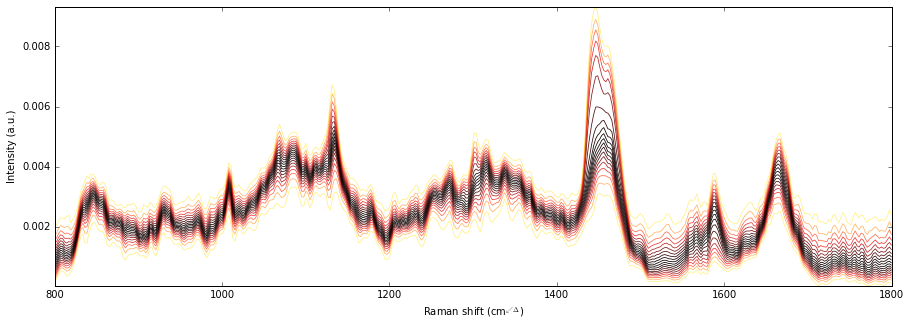

In [19]:
a.interpolate_spline(frac=0.3, interval=[800,1800])
a.rescale_sum()
print (len(a.wl))

fig, axes = plt.subplots(1) ; fig.set_size_inches(15, 5)
qline,ext = a.quantile_lineplot(lwd=0.8, nbins=20, colrange=[0.3,1], cmap="hot_r")
axes.add_collection(qline)
axes.set_ylim(ext[2:4]); axes.set_xlim(ext[0:2])
axes.set_ylabel("Intensity (a.u.)");  axes.set_xlabel("Raman shift (cm$^{-1}$)")

The last test is an MCR from this image only (the result below shows that 2 components can explain the spectra quite well, at least for this single image)

In [20]:
ab_estim, em_estim, resid = a.find_endmember_abundance_MCR(n_members=4, normalize=False, closure=True)

finished in 3 iterations


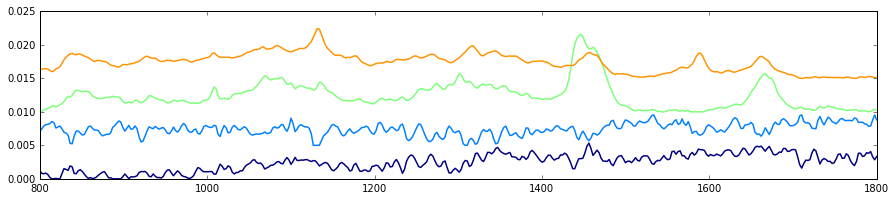

In [22]:
fig, axes = plt.subplots(1) ; fig.set_size_inches(15, 3)
for i in range(em_estim.shape[0]):
    axes.plot(a.wl, 0.005*i +  em_estim[i], linewidth=1.5, c=plt.cm.jet(float(i)/4.))

### Exporting the images as specimage objects

In [23]:
for fname in pairfiles:
    rpy2.robjects.r['load'](path+fname[0]+".Rdata")
    y=rpy2.robjects.numpy2ri.ri2py(rpy2.robjects.r['x'])
    a=SpecImage()
    a.wl = wl_axis # from file with wavelength numbers
    a.description = fname[0]
    n_y = y.shape[0]; n_x = y.shape[1]
    a.xy = np.array([[i,j] for i in range(n_x) for j in range(n_y)],dtype=float)
    a.spc = np.array([y[j,i] for i in range(n_x) for j in range(n_y)],dtype=float)
    a.interpolate_spline(frac=0.9)
# uncomment next line to actually save the objects to disk
#    a.save(filename=path+fname[0]+".mat") # specimage files are actually valid (HDF5) matlab files

Now the files can be accessed individually as Specimage objects. (However, to save disk space, we will work with the Rdata files directly in the real analyses)